In [ ]:
import pandas as pd
from scipy.stats import gmean
import numpy as np

# Load the dataset (assuming it's already loaded, but including for completeness)
df = pd.read_csv('/content/common_merged_aadhar_data_with_hospital_distances.csv')


In [ ]:
# Drop the 'Vaccination gap' column if it exists to prepare for recalculation
if 'Vaccination gap' in df.columns:
    df = df.drop(columns=['Vaccination gap'])

# Calculate 'engagement_gap'
df['engagement_gap'] = 1 - df['Average_annual_engagement_normalized']

# Display the DataFrame with the new 'engagement_gap' column
display(df[['District', 'Average_annual_engagement_normalized', 'engagement_gap']].head())

In [ ]:
import pandas as pd
from scipy.stats import gmean
import numpy as np

# Redefine columns to consider for the combined geometric mean, now including 'engagement_gap'
columns_for_new_gmean = [
    'early life visibility gap',
    'Follow_Through_Failure',
    'engagement_gap'
]

# Define a function to calculate the combined geometric mean for a group (district)
def calculate_combined_district_gmean_new(group_df):
    # Extract all values from the specified columns for the current district and flatten them
    all_values = group_df[columns_for_new_gmean].values.flatten()

    # Filter for positive values, as geometric mean is typically defined for positive numbers
    # and 0s would result in a GM of 0. NaNs are also excluded.
    positive_data = pd.Series(all_values).dropna().loc[lambda x: x > 0]

    if not positive_data.empty:
        return gmean(positive_data)
    else:
        return np.nan # Return NaN if no positive data to calculate gmean

# Calculate the 'Vaccination gap' for each district using the new definition
district_vaccination_gap_df_new = df.groupby('District').apply(calculate_combined_district_gmean_new).reset_index(name='Vaccination gap')

# Merge this new column back into the original DataFrame, overwriting any previous 'Vaccination gap'
df = df.merge(district_vaccination_gap_df_new, on='District', how='left')

# Display the DataFrame with the new 'Vaccination gap' column
display(df[['District', 'early life visibility gap', 'Follow_Through_Failure', 'engagement_gap', 'Vaccination gap']].head())

/tmp/ipython-input-3658613529.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  district_vaccination_gap_df_new = df.groupby('District').apply(calculate_combined_district_gmean_new).reset_index(name='Vaccination gap')


,District,early life visibility gap,Follow_Through_Failure,engagement_gap,Vaccination gap
0,Nicobar,0.146667,0.055186,0.351466,0.141692
1,North and Middle Andaman,0.030303,0.028770,0.028796,0.029281
2,South Andaman,0.056106,0.059751,0.125312,0.074894
3,Alluri Sitharama Raju,0.095004,0.156775,0.371206,0.176825
4,Anakapalli,0.022430,0.333396,0.177963,0.109995


In [ ]:
df.to_csv('final_processed_data.csv', index=False)

The DataFrame `df` has been saved to `final_processed_data.csv` in your Colab environment.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Reshape the 'Vaccination gap' column for scaling (MinMaxScaler expects 2D array)
vaccination_gap_data = df[['Vaccination gap']].dropna()

if not vaccination_gap_data.empty:
    # Fit and transform the data to a 0-1 range
    df.loc[df['Vaccination gap'].notna(), 'Vaccination_gap_normalized_0_1'] = \
        scaler.fit_transform(vaccination_gap_data)

    # Scale the 0-1 normalized data to a 1-100 range
    df['Vaccination_gap_normalized_1_100'] = df['Vaccination_gap_normalized_0_1'] * 99 + 1
else:
    df['Vaccination_gap_normalized_0_1'] = np.nan
    df['Vaccination_gap_normalized_1_100'] = np.nan

# Display the DataFrame with the new normalized columns
display(df[['District', 'Vaccination gap', 'Vaccination_gap_normalized_0_1', 'Vaccination_gap_normalized_1_100']].head())

,District,Vaccination gap,Vaccination_gap_normalized_0_1,Vaccination_gap_normalized_1_100
0,Nicobar,0.141692,0.118076,12.689544
1,North and Middle Andaman,0.029281,0.000000,1.000000
2,South Andaman,0.074894,0.047912,5.743285
3,Alluri Sitharama Raju,0.176825,0.154979,16.342963
4,Anakapalli,0.109995,0.084781,9.393351


In [ ]:
df.to_csv('final_data_aggregate.csv', index=False)

The DataFrame `df` has been saved to `final_data_aggregate.csv` in your Colab environment.

In [ ]:
# Sort the DataFrame by 'Vaccination gap' in descending order
top_15_districts_vaccination_gap = df.sort_values(by='Vaccination gap', ascending=False).head(15)

# Display the top 15 districts and their Vaccination gap
display(top_15_districts_vaccination_gap[['District', 'Vaccination gap']].head(15))

,District,Vaccination gap
535,Balotra,0.981307
564,Salumbar,0.975900
549,Didwana-Kuchaman,0.933825
433,Pherzawl,0.900551
547,Deeg,0.884011
539,Beawar,0.863612
472,Shamator,0.823862
86,Tamulpur,0.750826
34,Kamle,0.729824
290,Bengaluru Urban,0.705634


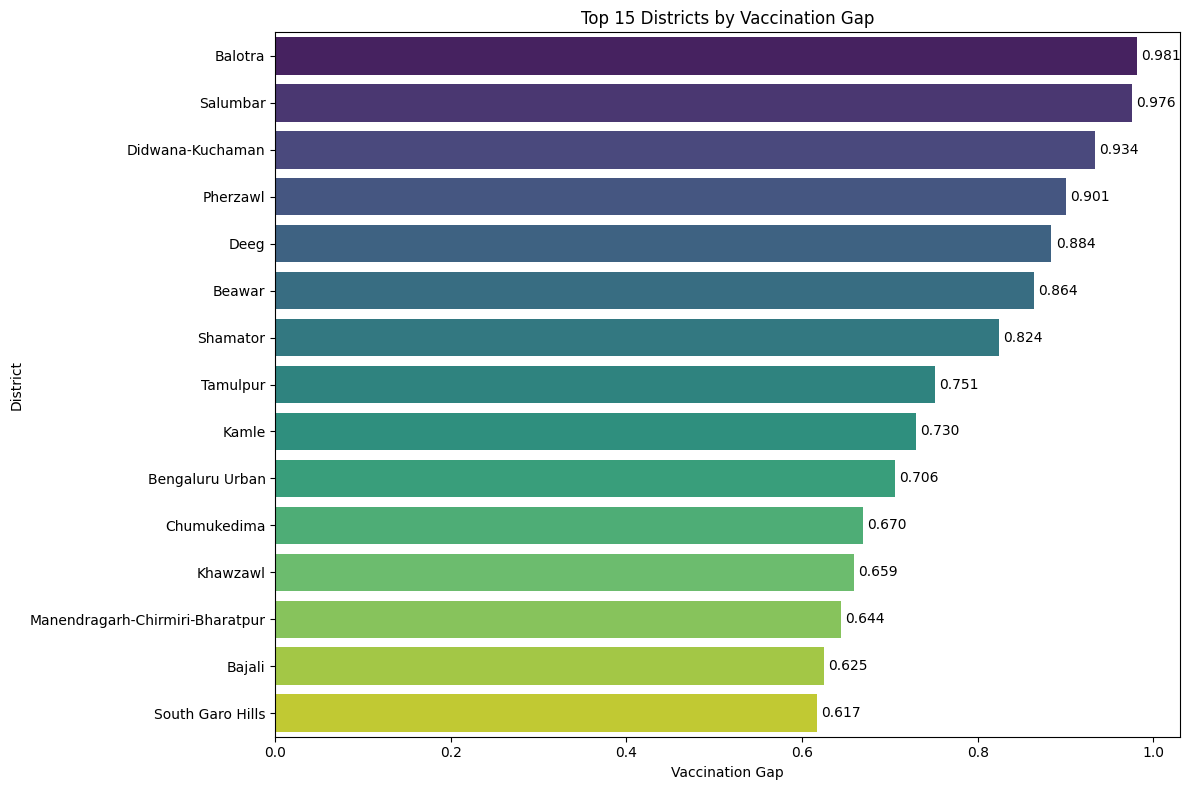

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
# Use a horizontal bar plot (x and y swapped)
ax = sns.barplot(x='Vaccination gap', y='District', data=top_15_districts_vaccination_gap, hue='District', palette='viridis', legend=False)
plt.title('Top 15 Districts by Vaccination Gap')
plt.xlabel('Vaccination Gap')
plt.ylabel('District')

# Add value labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge', padding=3)

plt.tight_layout()
plt.show()

In [ ]:
# Sort the DataFrame by 'Vaccination gap' in descending order
top_15_districts_vaccination_gap = df[df['District'] != 'Bengaluru Urban'].sort_values(by='Vaccination gap', ascending=False).head(15)

# Display the top 15 districts and their Vaccination gap
display(top_15_districts_vaccination_gap[['District', 'Vaccination gap']].head(15))

,District,Vaccination gap
535,Balotra,0.981307
564,Salumbar,0.975900
549,Didwana-Kuchaman,0.933825
433,Pherzawl,0.900551
547,Deeg,0.884011
539,Beawar,0.863612
472,Shamator,0.823862
86,Tamulpur,0.750826
34,Kamle,0.729824
460,Chumukedima,0.669613


In [ ]:
df = pd.read_csv('/content/processed_data.csv')

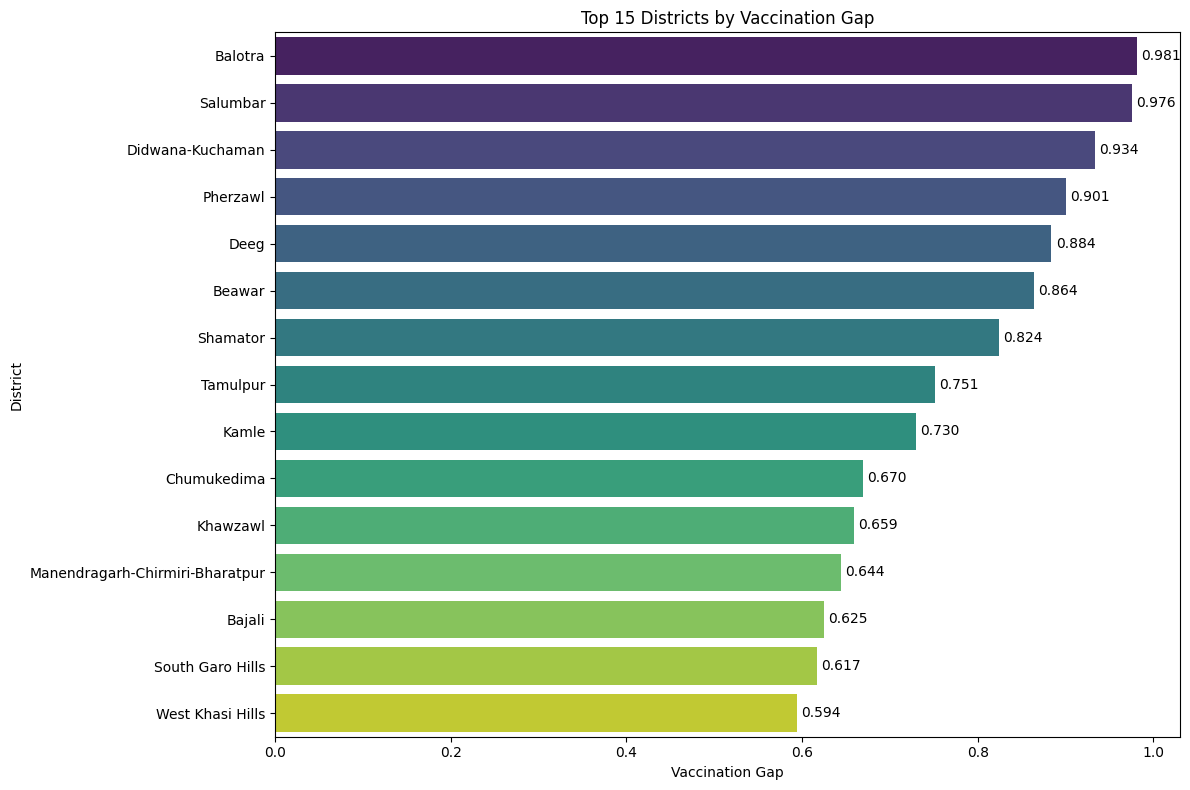

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
# Use a horizontal bar plot (x and y swapped)
ax = sns.barplot(x='Vaccination gap', y='District', data=top_15_districts_vaccination_gap, hue='District', palette='viridis', legend=False)
plt.title('Top 15 Districts by Vaccination Gap')
plt.xlabel('Vaccination Gap')
plt.ylabel('District')

# Add value labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge', padding=3)

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
# Use a horizontal bar plot (x and y swapped)
ax = sns.barplot(x='Vaccination gap', y='District', data=top_15_districts_vaccination_gap, hue='District', palette='viridis', legend=False)
plt.title('Top 15 Districts (Excluding Bengaluru Urban) by Vaccination Gap')
plt.xlabel('Vaccination Gap')
plt.ylabel('District')

# Add value labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge', padding=3)

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
# Use a horizontal bar plot (x and y swapped)
ax = sns.barplot(x='Vaccination gap', y='District', data=top_15_districts_vaccination_gap, hue='District', palette='viridis', legend=False)
plt.title('Top 15 Districts (Excluding Bengaluru Urban) by Vaccination Gap')
plt.xlabel('Vaccination Gap')
plt.ylabel('District')

# Add value labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge', padding=3)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

df['District area'] = (
    df['District area']
    .astype(str)
    .str.replace(',', '', regex=False)
    .str.replace('sq km', '', regex=False)
    .str.replace('km2', '', regex=False)
    .str.strip()
)

# Ensure numeric columns (invalid values → NaN)
df['District area'] = pd.to_numeric(df['District area'], errors='coerce')
df['hospital_count'] = pd.to_numeric(df['hospital_count'], errors='coerce')
df['age_0_5'] = pd.to_numeric(df['age_0_5'], errors='coerce')
df['age_5_17'] = pd.to_numeric(df['age_5_17'], errors='coerce')
df['age_18_greater'] = pd.to_numeric(df['age_18_greater'], errors='coerce')

# Aggregate district-level data safely
district_population_data = (
    df.groupby('District', as_index=False)
      .agg(
          age_0_5_sum=('age_0_5', 'sum'),
          age_5_17_sum=('age_5_17', 'sum'),
          age_18_greater_sum=('age_18_greater', 'sum'),
          district_area=('District area', 'max'),       # IMPORTANT FIX
          hospital_count=('hospital_count', 'max')      # IMPORTANT FIX
      )
)

# Compute total population
district_population_data['total_population'] = (
    district_population_data['age_0_5_sum'] +
    district_population_data['age_5_17_sum'] +
    district_population_data['age_18_greater_sum']
)

# Compute clinical overhead index (safe division)
district_population_data['clinical_overhead_index'] = np.where(
    district_population_data['hospital_count'] > 0,
    (district_population_data['total_population'] *
     district_population_data['district_area']) /
     district_population_data['hospital_count'],
    np.nan
)

# Merge back into original dataframe
df = df.merge(
    district_population_data[['District', 'clinical_overhead_index']],
    on='District',
    how='left'
)

# Display result
display(df)


,State,District,age_0_5,age_5_17,age_18_greater,bio_age_5_17,bio_age_17_,demo_age_5_17,demo_age_17_,hospital_count,...,district_lat,district_lon,district_location,average_nearest_5_hospitals,Unnamed: 19,District area,Vaccination gap,Unnamed: 22,hospital_count.1,clinical_overhead_index
0,Andaman and Nicobar Islands,Nicobar,64,11,0,992,819,58,733,3,...,7.120539,93.784150,"(7.1205395, 93.7841503)",64.317650,NaN,1841,0.173792,NaN,3,4.602500e+04
1,Andaman and Nicobar Islands,North and Middle Andaman,128,4,0,3780,2603,112,1897,5,...,12.560135,92.897625,"(12.5601347, 92.8976254)",10.973498,NaN,3736,0.094604,NaN,5,9.863040e+04
2,Andaman and Nicobar Islands,South Andaman,286,17,0,7033,5469,447,3999,9,...,10.744887,92.499992,"(10.7448873, 92.49999179999999)",5.634677,NaN,298,0.143132,NaN,9,1.003267e+04
3,Andhra Pradesh,Alluri Sitharama Raju,1105,116,34,8438,10169,1569,11302,35,...,17.697134,82.040714,"(17.6971337, 82.0407137)",8.583378,NaN,12251,0.210786,NaN,35,4.392859e+05
4,Andhra Pradesh,Anakapalli,523,12,8,3542,3181,1772,11688,65,...,17.689643,83.002363,"(17.6896435, 83.0023634)",0.822553,NaN,4292,0.183186,NaN,65,3.585471e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,West Bengal,South 24 Parganas,28400,9423,330,110738,147286,28544,414746,180,...,22.136674,88.556531,"(22.1366735, 88.55653099999999)",2.418093,NaN,9960,0.267029,NaN,180,2.111133e+06
768,West Bengal,South Dinajpur,6440,1396,133,21905,24879,5077,86020,60,...,25.371531,88.556531,"(25.3715308, 88.55653099999999)",2.637914,NaN,2219,0.239976,NaN,60,2.947202e+05
769,Dadra and Nagar Haveli and Daman and Diu,Dadra and Nagar Haveli,1309,225,39,11413,18353,1487,6470,35,...,20.180867,73.016914,"(20.1808672, 73.0169135)",NaN,NaN,491,0.213723,NaN,35,2.206694e+04
770,Dadra and Nagar Haveli and Daman and Diu,Daman,104,17,9,2961,3005,294,2874,25,...,20.397714,72.831964,"(20.3977145, 72.8319638)",NaN,NaN,72,0.211755,NaN,25,3.744000e+02


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Reshape the 'clinical_overhead_index' column for scaling (MinMaxScaler expects 2D array)
# Drop NaN values for scaling, then re-merge
clinical_overhead_index_data = df[['clinical_overhead_index']].dropna()

if not clinical_overhead_index_data.empty:
    # Fit and transform the data
    df.loc[df['clinical_overhead_index'].notna(), 'clinical_overhead_index_normalized'] = \
        scaler.fit_transform(clinical_overhead_index_data)
else:
    df['clinical_overhead_index_normalized'] = np.nan

# Display the DataFrame with the new normalized column
display(df[['District', 'clinical_overhead_index', 'clinical_overhead_index_normalized']].head())

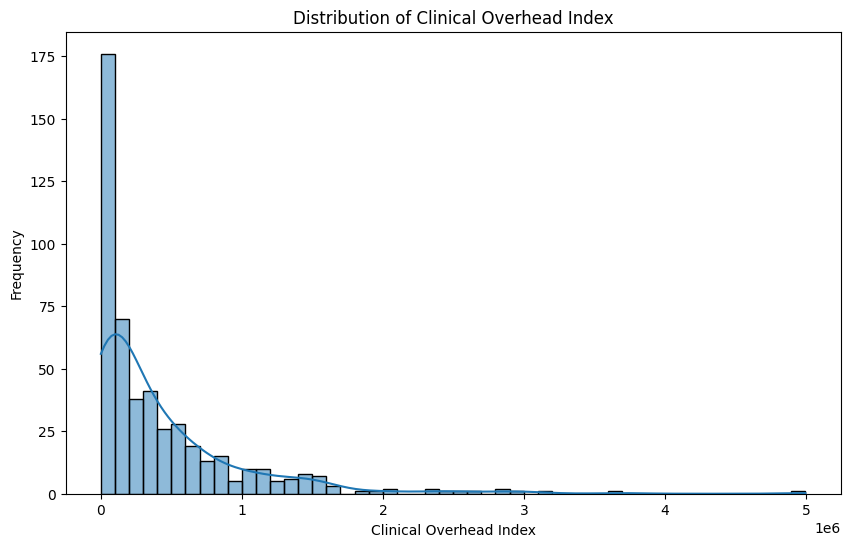

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['clinical_overhead_index'].dropna(), bins=50, kde=True)
plt.title('Distribution of Clinical Overhead Index')
plt.xlabel('Clinical Overhead Index')
plt.ylabel('Frequency')
plt.show()

The DataFrame `df` has been saved to `processed_data.csv` in your Colab environment.

In [ ]:
df.to_csv('processed_data_final.csv', index=False)

The final DataFrame, including the log-normalized clinical overhead index, has been saved to `processed_data_final.csv` in your Colab environment.

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Apply log transformation (using log1p to handle potential zeros)
df['clinical_overhead_index_log'] = np.log1p(df['clinical_overhead_index'])

# Initialize the MinMaxScaler again for the log-transformed data
scaler_log = MinMaxScaler()

# Reshape the log-transformed column for scaling and drop NaN values
clinical_overhead_index_log_data = df[['clinical_overhead_index_log']].dropna()

if not clinical_overhead_index_log_data.empty:
    # Fit and transform the log-transformed data
    df.loc[df['clinical_overhead_index_log'].notna(), 'clinical_overhead_index_log_normalized'] = \
        scaler_log.fit_transform(clinical_overhead_index_log_data)
else:
    df['clinical_overhead_index_log_normalized'] = np.nan

# Display the original, log-transformed, and new normalized columns
display(df[['District', 'clinical_overhead_index', 'clinical_overhead_index_log', 'clinical_overhead_index_log_normalized']].head())

,District,clinical_overhead_index,clinical_overhead_index_log,clinical_overhead_index_log_normalized
0,Nicobar,46025.000000,10.736962,0.573830
1,North and Middle Andaman,98630.400000,11.499145,0.637603
2,South Andaman,10032.666667,9.213701,0.446376
3,Alluri Sitharama Raju,439285.857143,12.992908,0.762588
4,Anakapalli,35854.707692,10.487258,0.552936


Now that we've applied a log transformation and re-normalized, let's look at the distribution of the `clinical_overhead_index_log_normalized` to see how it compares. This should give you a better spread of values.

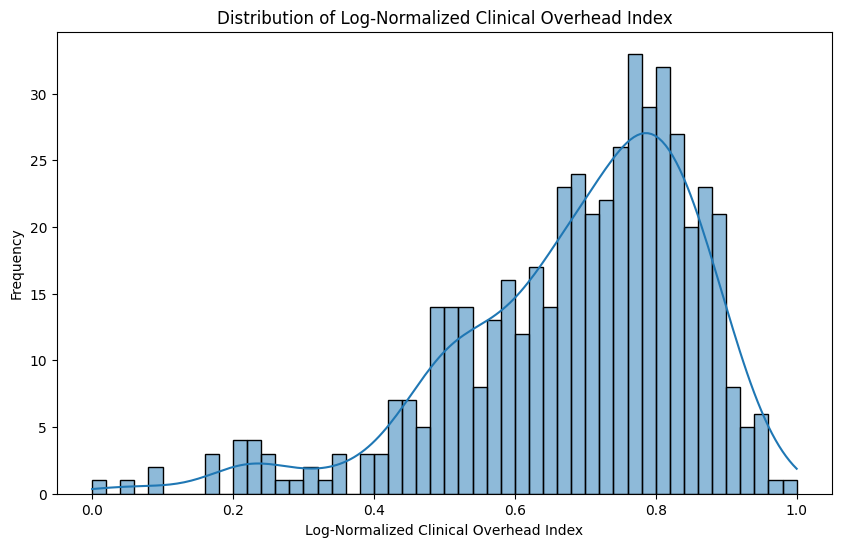

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['clinical_overhead_index_log_normalized'].dropna(), bins=50, kde=True)
plt.title('Distribution of Log-Normalized Clinical Overhead Index')
plt.xlabel('Log-Normalized Clinical Overhead Index')
plt.ylabel('Frequency')
plt.show()

## Calculate COI Deciles

### Subtask:
Calculate the decile boundaries for the `clinical_overhead_index_log_normalized` column. This will help in dividing the districts into 10 equal groups based on their clinical overhead index.


**Reasoning**:
Calculate the deciles for the `clinical_overhead_index_log_normalized` column and store them in a new column called `COI_Decile`.



In [ ]:
df['COI_Decile'] = pd.qcut(df['clinical_overhead_index_log_normalized'], q=10, labels=False, duplicates='drop')

# Display the first few rows with the new COI_Decile column
display(df[['District', 'clinical_overhead_index_log_normalized', 'COI_Decile']].head())

,District,clinical_overhead_index_log_normalized,COI_Decile
0,Nicobar,0.594018,2.0
1,North and Middle Andaman,0.660035,3.0
2,South Andaman,0.462081,0.0
3,Alluri Sitharama Raju,0.789418,6.0
4,Anakapalli,0.572390,2.0


**Reasoning**:
Now that the `COI_Decile` column has been created, the next step is to calculate the percentage of districts falling into each decile to understand the distribution.



In [ ]:
decile_counts = df['COI_Decile'].value_counts().sort_index()
total_districts = df['COI_Decile'].count()
decile_percentages = (decile_counts / total_districts) * 100

print("Percentage of districts in each COI Decile:")
print(decile_percentages)

Percentage of districts in each COI Decile:
COI_Decile
0.0    10.10101
1.0    10.10101
2.0     9.89899
3.0     9.89899
4.0    10.10101
5.0     9.89899
6.0     9.89899
7.0    10.10101
8.0     9.89899
9.0    10.10101
Name: count, dtype: float64


## Visualize Decile Distribution

### Subtask:
Generate a bar chart showing the percentage of districts in each `COI_Decile`.


**Reasoning**:
To visualize the distribution of districts across `COI_Decile`, I will generate a bar chart using `matplotlib` and `seaborn` based on the `decile_percentages` Series.



/tmp/ipython-input-243039113.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=decile_percentages.index, y=decile_percentages.values, palette='viridis')


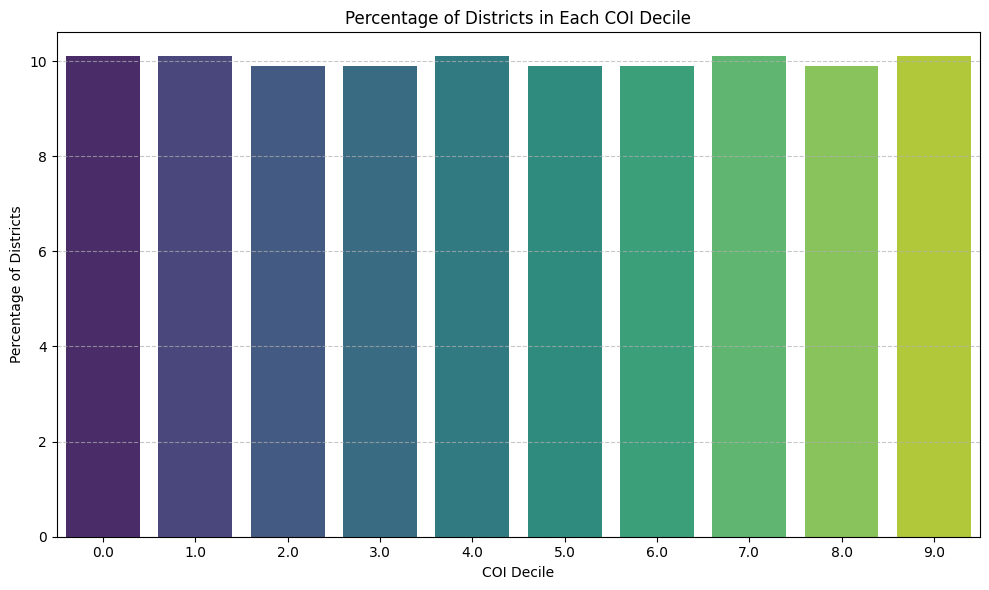

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=decile_percentages.index, y=decile_percentages.values, palette='viridis')
plt.title('Percentage of Districts in Each COI Decile')
plt.xlabel('COI Decile')
plt.ylabel('Percentage of Districts')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Rescale the log-normalized clinical overhead index to a range of 0 to 100
df['clinical_overhead_index_log_scaled_100'] = df['clinical_overhead_index_log_normalized'] * 100

# Display the original normalized and the new scaled column
display(df[['District', 'clinical_overhead_index_log_normalized', 'clinical_overhead_index_log_scaled_100']].head())

,District,clinical_overhead_index_log_normalized,clinical_overhead_index_log_scaled_100
0,Nicobar,0.573830,57.382960
1,North and Middle Andaman,0.637603,63.760270
2,South Andaman,0.446376,44.637593
3,Alluri Sitharama Raju,0.762588,76.258828
4,Anakapalli,0.552936,55.293648


In [ ]:
# Sort the DataFrame by 'clinical_overhead_index_log_normalized' in descending order
top_20_districts = df.sort_values(by='clinical_overhead_index_log_normalized', ascending=False)

# Get the top 20 districts and display relevant columns
display(top_20_districts[['District', 'clinical_overhead_index_log_normalized']].head(20))

,District,clinical_overhead_index_log_normalized
538,Barmer,1.000000
190,Kachchh,0.966013
560,Nagaur,0.943650
542,Bikaner,0.943323
178,Banaskantha,0.940620
545,Churu,0.938240
557,Jodhpur,0.928019
553,Jaisalmer,0.926924
344,Chhatarpur,0.926051
665,Bahraich,0.923680


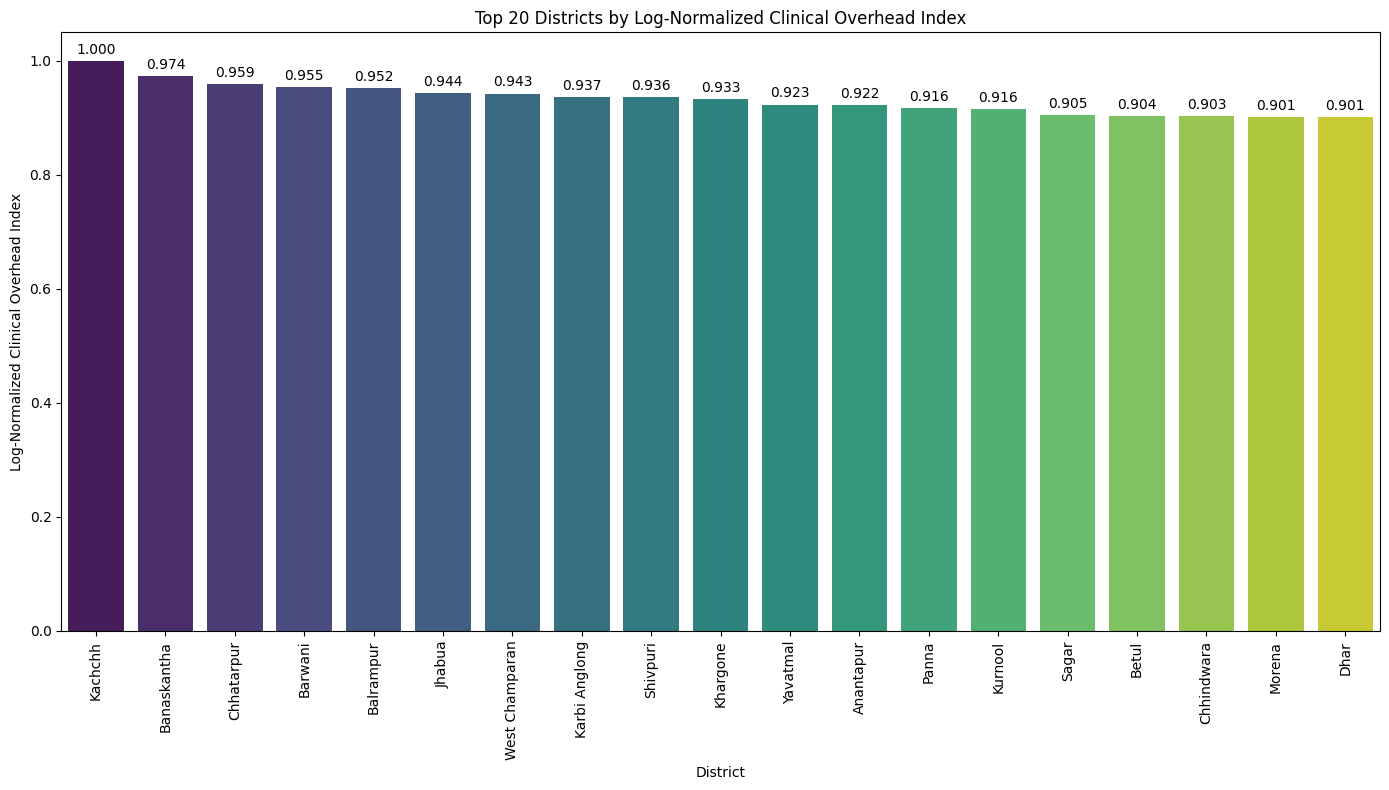

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
ax = sns.barplot(x='District', y='clinical_overhead_index_log_normalized', data=top_20_districts.head(20), hue='District', palette='viridis', legend=False)
plt.title('Top 20 Districts by Log-Normalized Clinical Overhead Index')
plt.xlabel('District')
plt.ylabel('Log-Normalized Clinical Overhead Index')
plt.xticks(rotation=90) # Rotate labels for better readability

# Add value labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge', padding=3)

plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

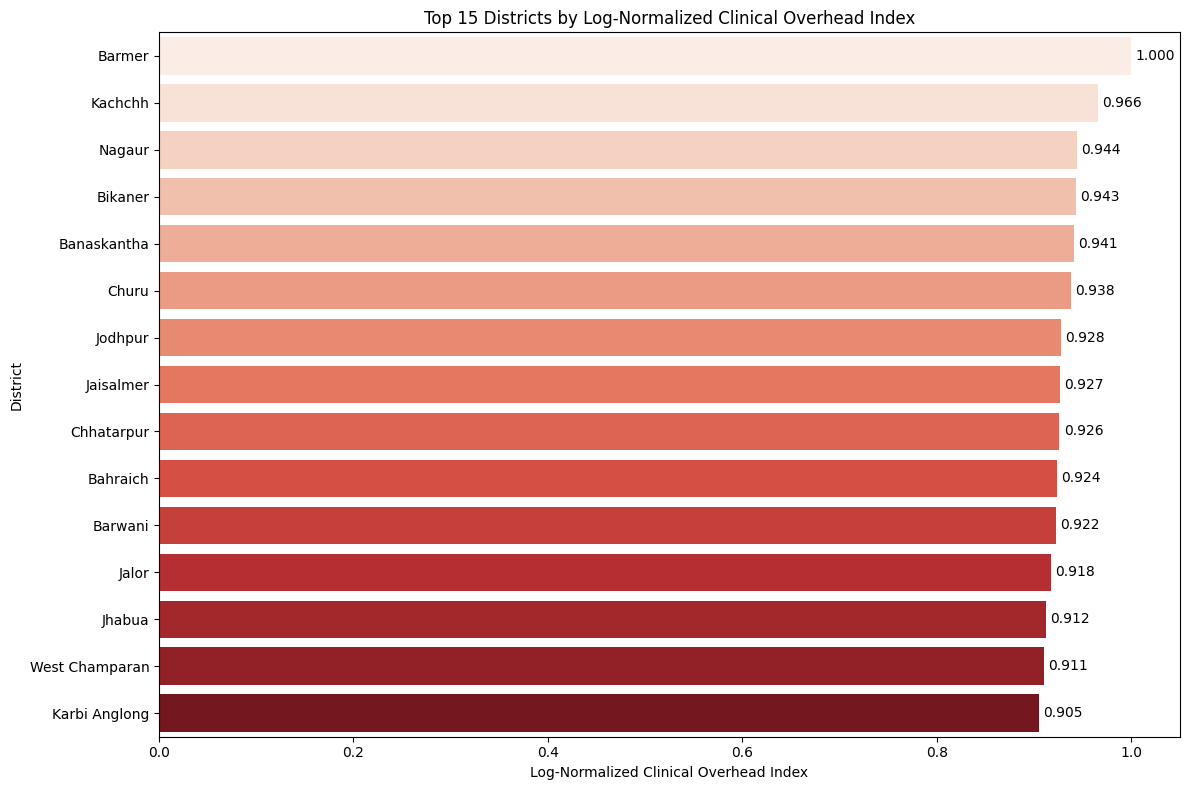

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 15 districts from the already sorted DataFrame
top_15_districts = top_20_districts.head(15)

plt.figure(figsize=(12, 8))
# Use a horizontal bar plot (x and y swapped)
ax = sns.barplot(x='clinical_overhead_index_log_normalized', y='District', data=top_15_districts, hue='District', palette='Reds', legend=False)
plt.title('Top 15 Districts by Log-Normalized Clinical Overhead Index')
plt.xlabel('Log-Normalized Clinical Overhead Index')
plt.ylabel('District')

# Add value labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge', padding=3)

plt.tight_layout()
plt.show()